In [1]:
import h5py
import numpy as np
import scipy
import itertools
from scipy.io import loadmat
import matplotlib.pyplot as plt

import sklearn
from sklearn.metrics import confusion_matrix

import pandas as pd
import tensorflow as tf
print(tf.__version__)

from keras.models import Sequential, load_model
from tensorflow.keras.layers import Reshape, Flatten, Dense, Conv1D ,Conv2D, MaxPooling2D, MaxPooling1D,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam, Adamax
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

2022-03-17 21:49:18.003815: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/user12/Radio/lib/:
2022-03-17 21:49:18.003853: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


2.7.0


In [2]:
def evaluation_tf(report, y_test, y_pred, classes):
    plt.plot(report.history['loss'], label = 'training_loss')
    plt.plot(report.history['val_loss'], label = 'validation_loss')
    plt.legend()
    plt.show()
    plt.plot(report.history['accuracy'], label = 'training_accuracy')
    plt.plot(report.history['val_accuracy'], label = 'validation_accuracy')
    plt.legend()
    plt.show()
    
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,6))
    plt.imshow(cm, cmap=plt.cm.Blues)
    print(cm.shape[0],cm.shape[1])
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i,j], 'd'),
                 horizontalalignment = 'center',
                 color='black')

    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.show()

In [3]:
model = load_model("/home/user12/Documents/MODCOD_Dir/Mod_3L_4D_16S16.h5")

2022-03-17 21:49:19.850559: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/user12/Radio/lib/:
2022-03-17 21:49:19.850610: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-17 21:49:19.850665: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ipt-Precision-7920-Tower): /proc/driver/nvidia/version does not exist
2022-03-17 21:49:19.851097: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
filename = "/home/user12/Saad_External/MODCOD_DataSet/MOD_DATASET/MOD_Rician0p3fadded_16Samp_N1.h5"
f = h5py.File(filename, 'r')
a_group_key = list(f.keys())
print (a_group_key)


['DATA', 'DATATYPE', 'SNR']


In [5]:
data = np.array(f[a_group_key[0]])            #(600000, 256, 4)
datatype = np.array(f[a_group_key[1]])         #(600000, 1)
SNR = np.array(f[a_group_key[2]])               #(600000, 1)

print(data.shape)
print(datatype.shape)
print(SNR.shape)

(600000, 256, 4)
(600000, 1)
(600000, 1)


In [6]:
print(type(data)) 
print(type(datatype))
print(type(SNR))

print(data.shape)
print(datatype.shape)
print(SNR.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(600000, 256, 4)
(600000, 1)
(600000, 1)


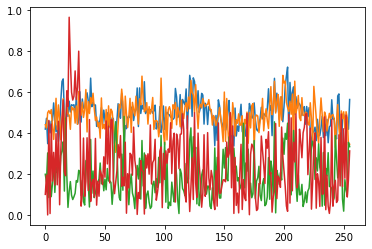

[0.41982781 0.47268485 0.3484194  0.45867004 0.40132625 0.45798746
 0.46098302 0.54785305 0.46656418 0.40614299 0.43775029 0.35915126
 0.41393292 0.55809733 0.6526628  0.66521155 0.48606686 0.41562889
 0.57698412 0.48189241 0.55627159 0.50352011 0.53896261 0.53485693
 0.53890911 0.48494773 0.57738266 0.44344074 0.46581509 0.60215904
 0.4542087  0.56697663 0.52327059 0.52038245 0.56874747 0.59712417
 0.55790272 0.51903559 0.6690036  0.52934035 0.54973304 0.53596995
 0.53785828 0.43307271 0.45936436 0.42586941 0.47482616 0.52492612
 0.44255009 0.51260667 0.46482744 0.44051883 0.49959454 0.42407713
 0.45403986 0.4223489  0.47472781 0.47091269 0.34968024 0.38046618
 0.46412901 0.5437773  0.49240267 0.4728898  0.59432931 0.52416902
 0.34878228 0.43656597 0.42180732 0.47725409 0.48315238 0.47646837
 0.52713121 0.51834445 0.46177156 0.50183892 0.51424761 0.62096605
 0.43216087 0.62104812 0.49614444 0.53486835 0.51735753 0.65148407
 0.49574509 0.50638182 0.51773395 0.5096998  0.51464521 0.5118

In [7]:
point = 800
plt.plot(data[point,:,0])
plt.plot(data[point,:,1])
plt.plot(data[point,:,2])
plt.plot(data[point,:,3])

plt.show()

print(data[point,:,0])
print(datatype[point])
print(SNR[point])

# 0--BPSK , 1--QPSK , 2--PSK8 , 3--PSK16, 4--QAM16 , 5--QAM32
# [-4:2:14]

In [8]:
#data = f[a_group_key[0]]              #(600000, 256, 4)
#datatype = f[a_group_key[1]]          #(600000, 1)
#SNR = f[a_group_key[2]]               #(600000, 1)


#print(data.shape)
#print(datatype.shape)
#print(SNR.shape)

# Six different Modulation each with 100000 in length
# SNR... 10 bins for each modulation

# Result should be list of pair--- (16 symbols packet--- 256, Modulation Scheme (0...5))

# Write into pre-processed training data!

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, datatype, test_size = 0.2)

In [10]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
                
                

(480000, 256, 4)
(120000, 256, 4)
(480000, 1)
(120000, 1)


In [11]:
report = model.fit(X_train, y_train, epochs = 20, validation_data=(X_test, y_test))

2022-03-17 21:50:56.264808: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1966080000 exceeds 10% of free system memory.


Epoch 1/20
15000/15000 [==============================] - 242s 16ms/step - loss: 0.8269 - accuracy: 0.5972 - val_loss: 0.5820 - val_accuracy: 0.7002
Epoch 2/20
15000/15000 [==============================] - 262s 17ms/step - loss: 0.5759 - accuracy: 0.7037 - val_loss: 0.5312 - val_accuracy: 0.7147
Epoch 3/20
15000/15000 [==============================] - 272s 18ms/step - loss: 0.5404 - accuracy: 0.7191 - val_loss: 0.5056 - val_accuracy: 0.7273
Epoch 4/20
15000/15000 [==============================] - 267s 18ms/step - loss: 0.5214 - accuracy: 0.7271 - val_loss: 0.5087 - val_accuracy: 0.7313
Epoch 5/20
15000/15000 [==============================] - 267s 18ms/step - loss: 0.5110 - accuracy: 0.7334 - val_loss: 0.5208 - val_accuracy: 0.7294
Epoch 6/20
15000/15000 [==============================] - 274s 18ms/step - loss: 0.5012 - accuracy: 0.7378 - val_loss: 0.4832 - val_accuracy: 0.7400
Epoch 7/20
15000/15000 [==============================] - 277s 18ms/step - loss: 0.4948 - accuracy: 0.7402

In [12]:
model.save('Mod_3L_4D_16S16_TF_0p3rician_N.h5')

In [13]:
y_pred = model.predict(X_test).argmax(axis = 1)

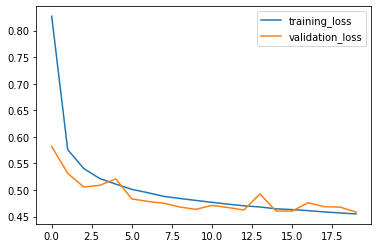

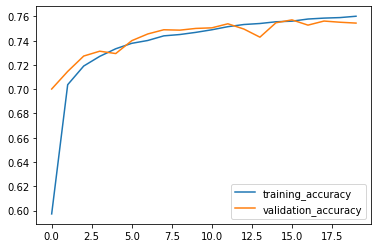

6 6


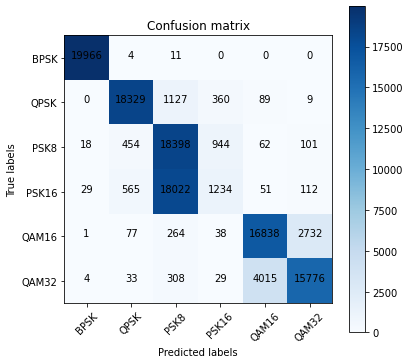

In [14]:
# 0--BPSK , 1--QPSK , 2--PSK8 , 3--PSK16, 4--QAM16 , 5--QAM32
Y = ['BPSK','QPSK','PSK8','PSK16','QAM16','QAM32']
evaluation_tf(report, y_test, y_pred, Y)